In [9]:
import os
from collections import Counter

base_path = 'public_dataset/'
# find all .ogg and .webm files
audio_files = []
for root, _, files in os.walk(base_path):
    for f in files:
        if f.lower().endswith(('.ogg')): #or '.webm'
            audio_files.append(os.path.join(root, f))

# counts by extension
ext_counts = Counter(os.path.splitext(f)[1].lower() for f in audio_files)
print("Total files:", len(audio_files))
print(audio_files[0])
print("By format:", ext_counts)


Total files: 859
public_dataset/0080c4be-010c-4037-bba2-743437db3beb.ogg
By format: Counter({'.ogg': 859})


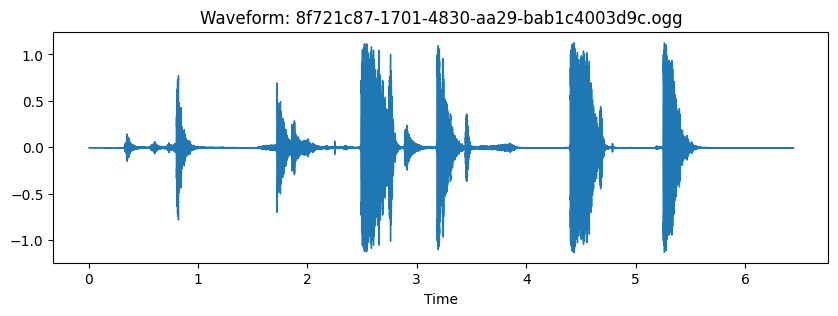

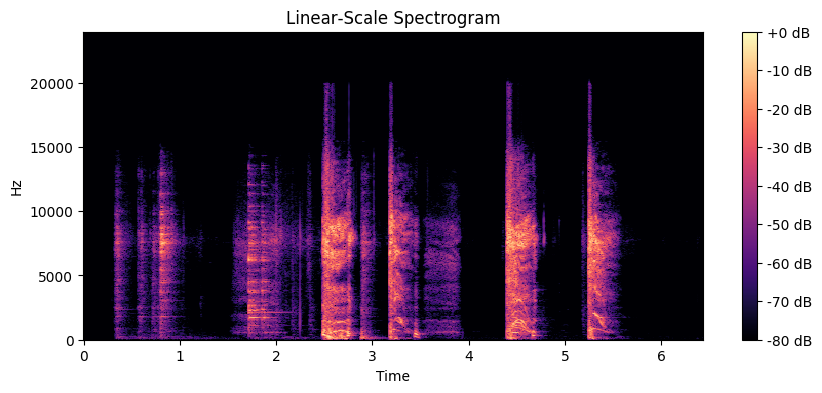

In [ ]:
import random
import librosa.display
import matplotlib.pyplot as plt

sample_fp = random.choice(audio_files)
y, sr = librosa.load(sample_fp, sr=None)
plt.figure(figsize=(10,3))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform: {os.path.basename(sample_fp)}')
plt.show()

# Spectrogram
import numpy as np
D = np.abs(librosa.stft(y))
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear‐Scale Spectrogram')
plt.show()


In [11]:
import librosa
import pandas as pd

records = []
for fp in audio_files:
    # load minimally: only header info if using soundfile
    y, sr = librosa.load(fp, sr=None, mono=False)  
    duration = y.shape[-1] / sr
    channels = 1 if y.ndim == 1 else y.shape[0]
    records.append({'file': os.path.basename(fp),
                    'ext': os.path.splitext(fp)[1].lower(),
                    'sr': sr,
                    'duration_s': duration,
                    'channels': channels})

df_meta = pd.DataFrame(records)
df_meta.head()


,file,ext,sr,duration_s,channels
0,0080c4be-010c-4037-bba2-743437db3beb.ogg,.ogg,48000,10.010083,1
1,009e677f-e0ed-4765-9f9e-db3fff3921a3.ogg,.ogg,48000,9.738667,1
2,009e762a-b4f7-41a6-a419-b4ca51be88ec.ogg,.ogg,48000,10.013333,2
3,00a0156b-7179-4773-8a2c-4bb919e076bd.ogg,.ogg,48000,4.426896,2
4,0288d081-951c-45f1-9fa6-9ce81a222716.ogg,.ogg,48000,2.816000,2


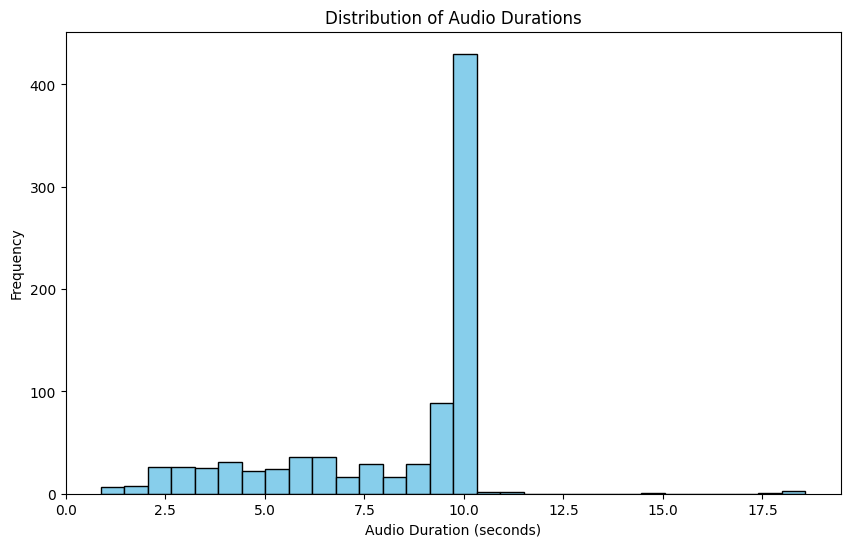

In [14]:
#Examine audio duration
plt.figure(figsize=(10, 6))
plt.hist(df_meta['duration_s'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Audio Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Durations')
plt.show()

In [ ]:
df_meta['duration_s'].describe()

count    859.000000
mean       8.194027
std        2.667829
min        0.880000
25%        6.292052
50%        9.760000
75%        9.997333
max       18.580583
Name: duration_s, dtype: float64